# The Sparks Foundation : Data Science and Business Analytics Intern
### **Author - Gaurav Prasad**

## **Task - 2 : Prediction using Unsupervised ML**


**Given task is to use ‘Iris’ flower dataset to predict the optimum number of clusters and represent it visually.**

**Algorithm used : K-means clustering**

We can cluster Iris Dataset using K-Means Clustering Attribute Information:

sepal length in cm

sepal width in cm

petal length in cm

petal width in cm

class: -- Iris-setosa -- Iris-versicolour -- Iris-virginica

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
#loading dataset
iris = pd.read_csv(r'D:\iris.csv')
x = iris.iloc[:,[0,1,2,3]].values


In [3]:
iris.info()
iris.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris_outcome = pd.crosstab(index = iris["Species"], columns = 'count')
iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


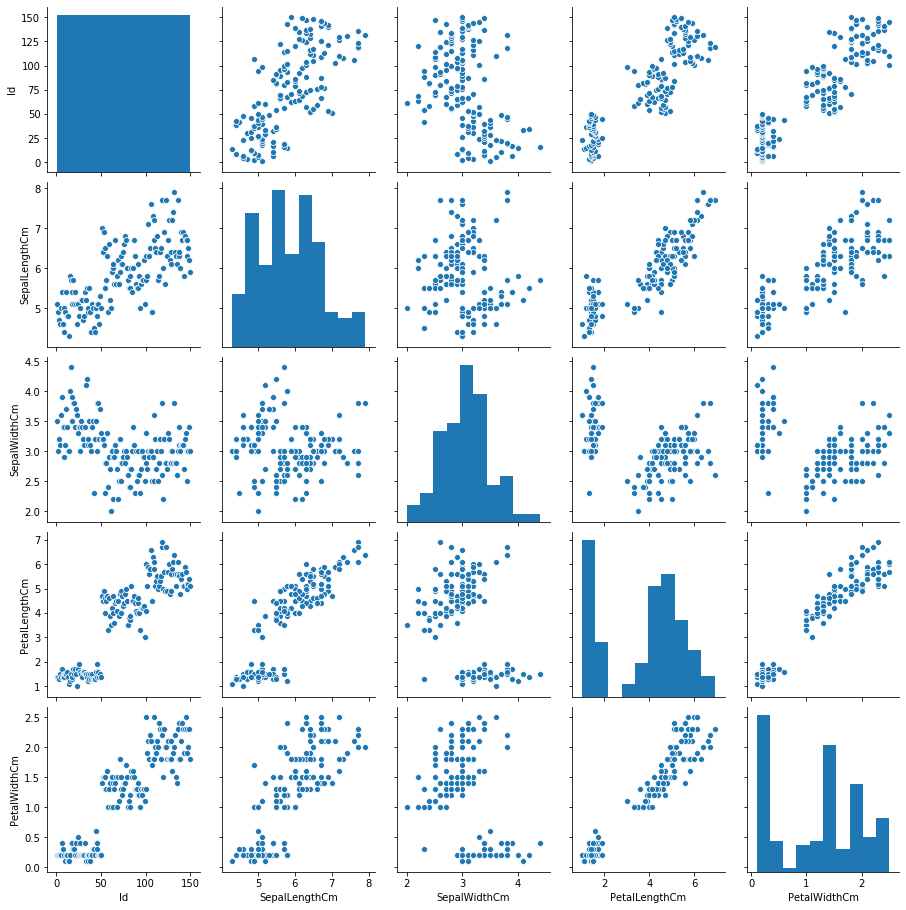

In [6]:
sns.pairplot(iris)
plt.show()

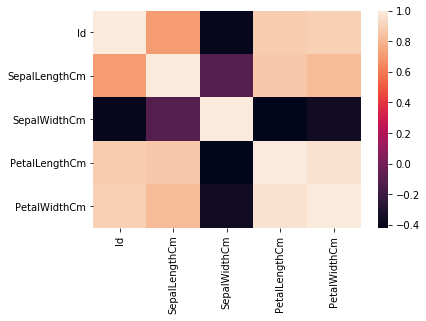

In [7]:
sns.heatmap(iris.corr())

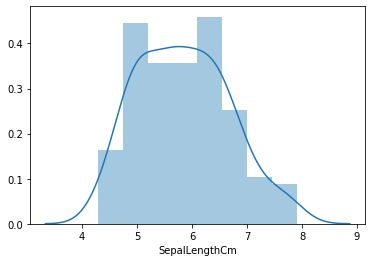

In [8]:
sns.distplot(iris['SepalLengthCm'])

**Distribution plot for each species**

In [9]:
iris_setosa = iris.loc[iris['Species']=='Iris-setosa']
iris_virginica = iris.loc[iris['Species']=='Iris-virginica']
iris_versicolor = iris.loc[iris['Species']=='Iris-versicolor']

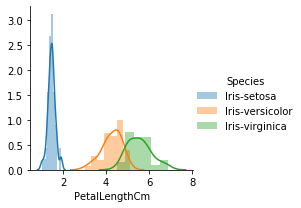

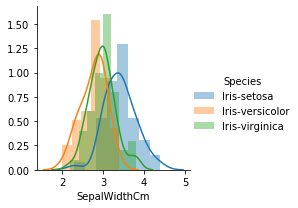

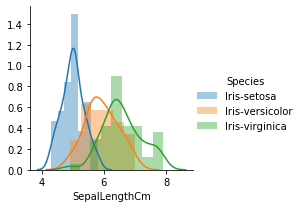

In [10]:
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalWidthCm").add_legend()
sns.FacetGrid(iris,hue="Species",height=3).map(sns.distplot,"SepalLengthCm").add_legend()

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


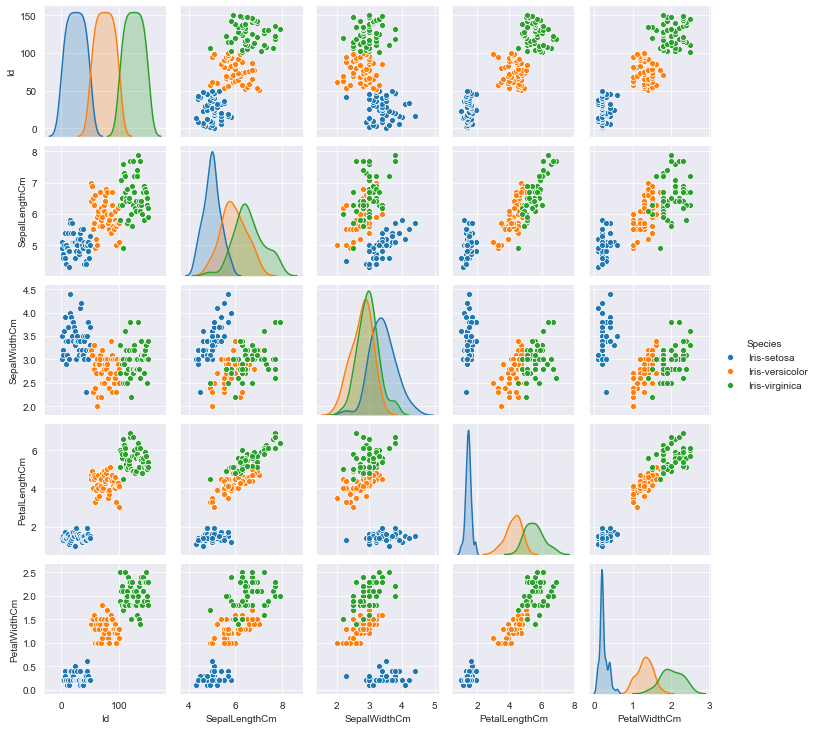

In [11]:
sns.set_style("darkgrid")
sns.pairplot(iris, hue='Species', size = 2)
plt.show()

# **K - Means
The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. K-Means is a centroid based algorithm ,or a distance-based algorithm where we calculate the distance to assign a point to a cluster. In K-means, each cluster is associated with a centroid. **

In [12]:
a= []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = "k-means++", max_iter = 300, n_init =10, random_state =0)
    kmeans.fit(x)
    a.append(kmeans.inertia_)

**To find out K-Clusters using Elbow method**

Text(0, 0.5, 'a')

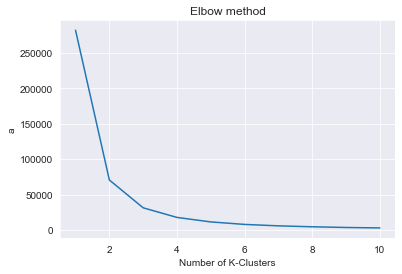

In [13]:
plt.plot(range(1,11), a)
plt.xlabel('Number of K-Clusters')
plt.title('Elbow method')
plt.ylabel('a')

**There is a decrease in a from 2 to 3 (sudden decrease implies an increase in performance of the clusters.)**

In [14]:
kmeans = KMeans(n_clusters =3, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

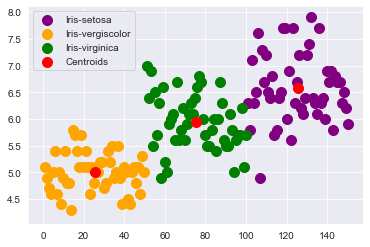

In [15]:
#Displaying the clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c = 'purple', label = 'Iris-setosa' )
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c = 'orange', label = 'Iris-vergiscolor' )
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c = 'green', label = 'Iris-virginica' )
#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

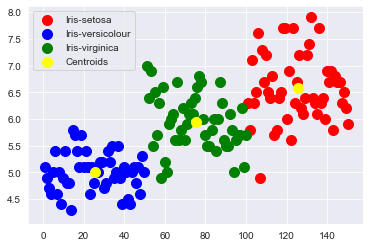

In [16]:
#Displaying the clusters
plt.scatter(x[y_kmeans ==0,0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')
#plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()